<h1 align=center><font size=5>Data Analysis with Python</font></h1>

<h1>Data Wrangling</h1>

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    
Estimated Time Needed: <strong>30 min</strong>
</div>
 
<hr>

<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>

<h3>Import data</h3>
<p>
You can find the "Automobile Data Set" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
We will be using this data set throughout this implementation.
</p>

Import pandas,matplotlib and seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Reading the data set from the URL and adding the related headers.</h2>

URL of the dataset

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Python list headers containing name of headers

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
cars=pd.read_csv(filename,names=headers)  #Importing the dataset into dataframe

Use the method <code>head()</code> to display the first five rows of the dataframe.

In [5]:
cars.head()   #Bydefault first five rows are displayed otherwise no of rows to be displayed can be passed as a parameter.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Use the method <code>tail()</code> to display the Last five rows of the dataframe.

In [6]:
cars.tail()    #Bydefault Last five rows are displayed otherwise no of rows to be displayed can be passed as a parameter.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [7]:
import numpy as np
cars.replace('?',np.nan,inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [9]:
missing_cars=cars.isnull()
missing_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [11]:
for column in missing_cars.columns.values.tolist():
    print(column)
    print(missing_cars[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [13]:
avg_norm_loss=cars['normalized-losses'].astype(float).mean()
print("Average of normalized-losses is:",avg_norm_loss)

Average of normalized-losses is: 122.0


Replace "NaN" by mean value in "normalized-losses" column

In [14]:
cars['normalized-losses'].replace(np.nan,avg_norm_loss,inplace=True)

Similarly calculating mean and replacing null values with their mean

In [15]:
avg_stroke=cars['stroke'].astype('float').mean()
cars['stroke'].replace(np.nan,avg_stroke,inplace=True)

avg_horsepower = cars['horsepower'].astype('float').mean()
cars['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=cars['peak-rpm'].astype('float').mean()
cars['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


To see which values are present in a particular column, we can use the ".value_counts()" method:

In [18]:
cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Here as we can possibly see that 'four' occurs maximum no of times in 'num-of-doors' column,hence we replace the 2 missing values with 'four'

In [19]:
cars['num-of-doors'].replace(np.nan,'four',inplace=True)

Finally, let's drop all rows that do not have price data:

In [21]:
# simply drop whole row with NaN in "price" column
cars.dropna(subset=['price'], axis=0, inplace=True)

# reset index, because we droped two rows
cars.reset_index(drop=True, inplace=True)

In [22]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Good!** Now, we obtain the dataset with no missing values.

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

#### Lets list the data types for each column

In [24]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the <code>astype()</code> method.

In [25]:
cars[['bore','stroke','price','peak-rpm']]=cars[['bore','stroke','price','peak-rpm']].astype('float')
cars['normalized-losses']=cars['normalized-losses'].astype('int')


<h4>Let us list the columns after the conversion</h4>

In [26]:
cars.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>

The formula for unit conversion is

L/100km = 235 / mpg

We can do many mathematical operations directly in Pandas.

In [34]:
cars['city-L/100km']=235/cars['city-mpg']
#remove city-mpg column using drop()
cars.drop(['city-mpg'],axis=1,inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,22,17450.0,13.055556


In [35]:
cars['highway-L/100km']=235/cars['highway-mpg']
#remove city-mpg column using drop()
cars.drop(['highway-mpg'],axis=1,inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>
<b>Ways to Normalize</b>
<ol>
    <li>Simple Feature scaling: x<sub>new</sub>=x<sub>old</sub>/x<sub>max</sub></li>
    <li>Min-Max Normalization:x<sub>new</sub>=(x<sub>old</sub>-x<sub>min</sub>)/(x<sub>min</sub>-x<sub>max</sub>)
    <li>Z-Score Normalization:x<sub>new</sub>=(x<sub>old</sub>-μ)/σ   ,where 'μ' is the mean and 'σ' is the standard deviation
        
</ol>

In [37]:
cars[['length','width','height']]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
...,...,...,...
196,188.8,68.9,55.5
197,188.8,68.8,55.5
198,188.8,68.9,55.5
199,188.8,68.9,55.5


We will be using simple feature scaling

In [38]:
cars['length']=cars['length']/cars['length'].max()
cars['width']=cars['width']/cars['width'].max()
cars['height']=cars['height']/cars['height'].max()


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

### Example of Binning Data in pandas

 Convert data to correct format 

In [40]:
cars['horsepower']=cars['horsepower'].astype(int,copy=True)
cars
cars.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
price                float64
city-L/100km         float64
highway-L/100km      float64
dtype: object

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.We can plot histogram either using matplotlib <code>hist()</code> function or use seaborn library's <code>distplot()</code> and set kde to False.We will be using <code>distplot()</code> here to plot the histogram.

Text(0.5, 1.0, 'horsepower bins')

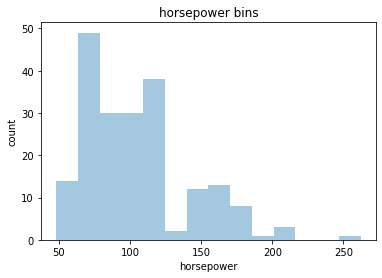

In [43]:
%matplotlib inline
sns.distplot(cars['horsepower'],kde=False)
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(cars["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(cars["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [45]:
bins=np.linspace(min(cars['horsepower']),max(cars['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [46]:
group=['Low','Medium','High']

We apply the function "cut" the determine what each value of "cars['horsepower']" belongs to.

In [47]:
cars['horsepower-binned']=pd.cut(cars['horsepower'],bins,labels=group,include_lowest=True)
cars[['horsepower-binned','horsepower']].head(20)

,horsepower-binned,horsepower
0,Low,111
1,Low,111
2,Medium,154
3,Low,102
4,Low,115
5,Low,110
6,Low,110
7,Low,110
8,Medium,140
9,Low,101


Lets see the number of vehicles in each bin.

In [49]:
cars['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'horsepower bins')

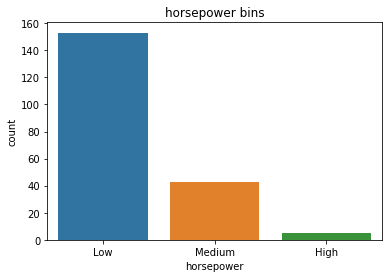

In [50]:
sns.countplot(x='horsepower-binned',data=cars)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

We successfully narrow the intervals from 57 to 3!

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [54]:
dummy_variable=pd.get_dummies(cars['fuel-type'])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset.

In [59]:
# merge data frame "df" and "dummy_variable" 
cars=pd.concat([cars,dummy_variable],axis=1)
#drop original column "fuel-type" from "df"
cars.drop("fuel-type", axis = 1, inplace=True)
cars

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.15,9.5,114,5400.0,16845.0,10.217391,8.392857,Low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.15,8.7,160,5300.0,19045.0,12.368421,9.400000,Medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,2.87,8.8,134,5500.0,21485.0,13.055556,10.217391,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.40,23.0,106,4800.0,22470.0,9.038462,8.703704,Low,1,0


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

Save the new csv

In [60]:
cars.to_csv("cars_clean.csv")